In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
data_file_path = os.getcwd() + "/Data/"
print(data_file_path)

/Users/kavehz98/Documents/GitHub/TItanic-Kaggle-Competition/Data/


In [19]:
titanic0 = pd.read_csv(data_file_path + "train.csv")

# **Phase I**: Exploratory Data Analysis

In [20]:
titanic0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Here, I'd like to get a good look at how many NaN values we have in the dataset
titanic0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Initializing `titanic1`: 2nd copy of the Dataset

In [25]:
# Making a copy of the dataset
titanic1 = titanic0.copy()

### **Observation**: The majority of the `Cabin` data is missing along with about a quarter of the `Age` data. Plan is to drop the `Cabin` feature while trying to fill in as much of the `Age` feature.

In [26]:
titanic1 = titanic1.drop(labels="Cabin", axis=1)
titanic1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,S


### Now dealing with missing `Age` data...

In [28]:
missing_age_data = titanic0[titanic0['Age'].isnull()]
missing_age_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"moran, mr. james",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"williams, mr. charles eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"masselmani, mrs. fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"emir, mr. farred chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"o'dwyer, miss. ellen ""nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [13]:
missing_age_data.to_csv("missing_age_data.csv")

### Initializing `titanic2`: 3rd copy of data

In [34]:
titanic2 = titanic1.copy()

In [35]:
# Parsing the Name Feature to only extract family names
# Plan: Potentially look at last names, group by it, and find out Sibling Parent relations and apply a typical age range 
titanic1[['LastName', 'FirstName']] = titanic1['Name'].str.split(', ', expand=True)

In [36]:
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer)
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel)
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,S,allen,mr. william henry


In [37]:
# Dropped Name Column from dataset
titanic2 = titanic2.drop(labels='Name', axis=1)

In [38]:
titanic2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina
3,4,1,1,female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,S,allen,mr. william henry


### Initializing Titanic 3: 4th copy of data

In [100]:
titanic3 = titanic2.copy()

In [101]:
def isMissingData(age):
    if pd.isna(age) == True:
        return True
    else:
        return False

In [102]:
titanic3['MissingAge'] = titanic3['Age'].apply(isMissingData)

In [103]:
display(titanic3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
0,1,0,3,male,22.00,1,0,A/5 21171,7.2500,S,braund,mr. owen harris,False
1,2,1,1,female,38.00,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer),False
2,3,1,3,female,26.00,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina,False
3,4,1,1,female,35.00,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel),False
4,5,0,3,male,35.00,0,0,373450,8.0500,S,allen,mr. william henry,False
5,6,0,3,male,NaN,0,0,330877,8.4583,Q,moran,mr. james,True
6,7,0,1,male,54.00,0,0,17463,51.8625,S,mccarthy,mr. timothy j,False
7,8,0,3,male,2.00,3,1,349909,21.0750,S,palsson,master. gosta leonard,False
8,9,1,3,female,27.00,0,2,347742,11.1333,S,johnson,mrs. oscar w (elisabeth vilhelmina berg),False
9,10,1,2,female,14.00,1,0,237736,30.0708,C,nasser,mrs. nicholas (adele achem),False


In [104]:
# Try to group data by Last Name
titanic_analysis0 = titanic3.groupby(by=['LastName', 'MissingAge']).count()

In [105]:
display(titanic_analysis0)

,,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FirstName
LastName,MissingAge,,,,,,,,,,,
abbing,False,1,1,1,1,1,1,1,1,1,1,1
abbott,False,2,2,2,2,2,2,2,2,2,2,2
abelson,False,2,2,2,2,2,2,2,2,2,2,2
adahl,False,1,1,1,1,1,1,1,1,1,1,1
adams,False,1,1,1,1,1,1,1,1,1,1,1
ahlin,False,1,1,1,1,1,1,1,1,1,1,1
aks,False,1,1,1,1,1,1,1,1,1,1,1
albimona,False,1,1,1,1,1,1,1,1,1,1,1
alexander,False,1,1,1,1,1,1,1,1,1,1,1


In [106]:
# Here, I'd like to create a list of all family names that have both missing and non-missing ages

last_names_mixed_age = []
multiindex_list = list(titanic_analysis0.index)

for i in range(len(multiindex_list)):
    if i != len(multiindex_list) - 1:
        if multiindex_list[i][0] == multiindex_list[i+1][0]:
            last_names_mixed_age.append(multiindex_list[i][0])

print(last_names_mixed_age)
print(len(last_names_mixed_age))      

['boulos', 'bourke', 'elias', 'flynn', 'frauenthal', 'goldenberg', 'hart', 'hoyt', 'kelly', 'meyer', 'olsen', 'petroff', 'saad', 'smith', 'taylor', 'webber', 'williams', 'zabour']
18


In [107]:
# Double checking that the correct rationale was followed
titanic3[titanic3['LastName'].isin(last_names_mixed_age)].sort_values(['LastName', 'MissingAge'])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
852,853,0,3,female,9.0,1,1,2678,15.2458,C,boulos,miss. nourelain,False
140,141,0,3,female,NaN,0,2,2678,15.2458,C,boulos,mrs. joseph (sultana),True
598,599,0,3,male,NaN,0,0,2664,7.2250,C,boulos,mr. hanna,True
188,189,0,3,male,40.0,1,1,364849,15.5000,Q,bourke,mr. john,False
657,658,0,3,female,32.0,1,1,364849,15.5000,Q,bourke,mrs. john (catherine),False
593,594,0,3,female,NaN,0,2,364848,7.7500,Q,bourke,miss. mary,True
352,353,0,3,male,15.0,1,1,2695,7.2292,C,elias,mr. tannous,False
532,533,0,3,male,17.0,1,1,2690,7.2292,C,elias,mr. joseph jr,False
773,774,0,3,male,NaN,0,0,2674,7.2250,C,elias,mr. dibo,True
572,573,1,1,male,36.0,0,0,PC 17474,26.3875,S,flynn,"mr. john irwin (""irving"")",False


# LOG: as of July 16th, 11:08 PM
### Left off from the top to here. 
### Plan for filling in missing ages:
### 1. Systematically figure out the age of the people in the data above
###    a. Sources listed in the comment below
###    b. In the early 1900s (lines up with Titanic sinking in 1912), women had children between the ages of 21 and 33 at about 3.5 children per family, leaving the age difference between siblings to be around 3-4 years apart.

### c. Here is another consideration: Married couples in the 1900s were typically 4 years apart (with the male counterpart being the older of the two).


In [108]:
# Reapplying Missing Age column formula, to get up to date values
titanic3['MissingAge'] = titanic3['Age'].apply(isMissingData)

In [109]:
titanic3[(titanic3['MissingAge'] == True) & (titanic3['Survived'] == 1)].count()

PassengerId    52
Survived       52
Pclass         52
Sex            52
Age             0
SibSp          52
Parch          52
Ticket         52
Fare           52
Embarked       52
LastName       52
FirstName      52
MissingAge     52
dtype: int64

In [110]:
titanic3[(titanic3['MissingAge'] == True) & (titanic3['Pclass'] == 3) & (titanic3['Survived'] == 1)].count()

PassengerId    34
Survived       34
Pclass         34
Sex            34
Age             0
SibSp          34
Parch          34
Ticket         34
Fare           34
Embarked       34
LastName       34
FirstName      34
MissingAge     34
dtype: int64

In [111]:
titanic3[(titanic3['MissingAge'] == True) & (titanic3['Survived'] == 1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
17,18,1,2,male,NaN,0,0,244373,13.0000,S,williams,mr. charles eugene,True
19,20,1,3,female,NaN,0,0,2649,7.2250,C,masselmani,mrs. fatima,True
28,29,1,3,female,NaN,0,0,330959,7.8792,Q,o'dwyer,"miss. ellen ""nellie""",True
31,32,1,1,female,NaN,1,0,PC 17569,146.5208,C,spencer,mrs. william augustus (marie eugenie),True
32,33,1,3,female,NaN,0,0,335677,7.7500,Q,glynn,miss. mary agatha,True
36,37,1,3,male,NaN,0,0,2677,7.2292,C,mamee,mr. hanna,True
47,48,1,3,female,NaN,0,0,14311,7.7500,Q,o'driscoll,miss. bridget,True
55,56,1,1,male,NaN,0,0,19947,35.5000,S,woolner,mr. hugh,True
65,66,1,3,male,NaN,1,1,2661,15.2458,C,moubarek,master. gerios,True
82,83,1,3,female,NaN,0,0,330932,7.7875,Q,mcdermott,miss. brigdet delia,True


In [112]:
age_data = pd.read_csv("age_data.csv")
age_data.head()

,PassengerId,Age
0,18,51
1,20,22
2,27,29
3,29,25
4,30,23


In [113]:
passenger_age_dict = {}

for i in range(age_data.shape[0]):
    passenger_age_dict[age_data['PassengerId'][i]] = age_data['Age'][i]

for passenger_id in passenger_age_dict.keys():
    titanic3.iloc[passenger_id - 1, 4] = passenger_age_dict[passenger_id]
titanic3.info()

print(titanic3.iloc[17,4])
print(titanic3.iloc[19,4])
print(titanic3.iloc[26,4])
print(titanic3.iloc[28,4])
print(titanic3.iloc[29,4])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          869 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  LastName     891 non-null    object 
 11  FirstName    891 non-null    object 
 12  MissingAge   891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB
51.0
22.0
29.0
25.0
23.0


In [114]:
titanic3 = titanic3.dropna(axis=0)

In [115]:
titanic3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer),False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina,False
3,4,1,1,female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel),False
4,5,0,3,male,35.0,0,0,373450,8.0500,S,allen,mr. william henry,False


In [116]:
# titanic3 = titanic3.drop(['Ticket', 'MissingAge', 'FirstName'], axis=1)
titanic3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer),False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina,False
3,4,1,1,female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel),False
4,5,0,3,male,35.0,0,0,373450,8.0500,S,allen,mr. william henry,False


In [117]:
# Creating a correlation matrix to see how the variables relate to one another
correlation_matrix = titanic3.corr(numeric_only=True)

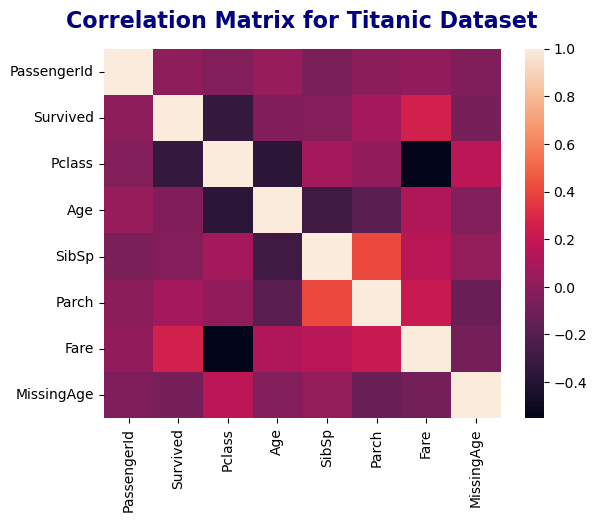

In [118]:
# Let's throw that on a heatmap for a visual and to get some good practice
sns.heatmap(correlation_matrix, cmap="rocket")
plt.title("Correlation Matrix for Titanic Dataset",pad=15, fontdict={'weight': 'heavy', 'size': 16, 'color': 'navy'})
plt.show()

## Phase 2:  One Hot Encoding categorical data

### Phase 2.1: Dealing with Sex feature

In [120]:
# This method (one hot encoding) is especially useful when our feature is not ordinal
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

sex_data_values = np.array(titanic3['Sex'])

sex_label_encoder = LabelEncoder()
sex_integer_encoded = sex_label_encoder.fit_transform(sex_data_values)
print(sex_integer_encoded)

sex_onehot_encoder = OneHotEncoder(sparse_output=False)
sex_integer_encoded = sex_integer_encoded.reshape(len(sex_integer_encoded), 1)
sex_onehot_encoded = sex_onehot_encoder.fit_transform(sex_integer_encoded)
print(sex_onehot_encoded)

[1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1
 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 1 

In [121]:
# titanic3['
male_data = []
female_data = []

for element in sex_onehot_encoded:
    male_data.append(element[1])
    female_data.append(element[0])
    
male_data = np.array(male_data)
female_data = np.array(female_data)

titanic3['Male'] = male_data.tolist()
titanic3['Female'] = female_data.tolist()

titanic3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge,Male,Female
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris,False,1.0,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer),False,0.0,1.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina,False,0.0,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel),False,0.0,1.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,allen,mr. william henry,False,1.0,0.0


In [122]:
titanic3 = titanic3.drop('Sex', axis=1)
titanic3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge,Male,Female
0,1,0,3,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris,False,1.0,0.0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer),False,0.0,1.0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina,False,0.0,1.0
3,4,1,1,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel),False,0.0,1.0
4,5,0,3,35.0,0,0,373450,8.0500,S,allen,mr. william henry,False,1.0,0.0


### Phase 2.2: Dealing with Embarked Feature

In [95]:
titanic3['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [125]:
embarked_data_values = np.array(titanic3['Embarked'])

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(embarked_data_values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 1 2 2 2 0 2 1 2 0 0 1 2 0 2 0 2
 2 0 2 2 0 0 1 2 1 1 0 2 2 2 0 2 0 2 2 0 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2
 2 0 2 1 2 0 2 2 2 0 2 2 0 1 2 2 0 2 2 2 2 0 2 2 2 0 0 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 2 2 0 2 2 2 2 1 2
 1 2 2 2 2 2 0 0 1 2 1 2 2 2 2 0 2 2 2 0 1 0 2 2 2 2 1 0 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0 1 2 2 2 2 2 2 2 2 2 0 0 2 0 2 1 2
 2 2 1 2 2 2 2 2 2 2 2 0 1 2 2 2 1 2 1 2 2 2 2 0 2 2 2 1 2 0 0 2 2 0 0 2 2
 0 1 1 2 1 2 2 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 1 2 2 0 2 2 2 0 1 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 1 1 2 0 0 2 1 2 0 0 1 0 0 2 2 0 2
 0 2 0 0 2 0 0 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 0 2 0 2 2 2 1 2 2 2 2 2 2 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2
 0 2 2 2 2 2 0 2 0 2 2 2 

In [126]:
embarked_s = []
embarked_c = []
embarked_q = []

for element in onehot_encoded:
    embarked_s.append(element[2])
    embarked_c.append(element[0])
    embarked_q.append(element[1])

embarked_s = np.array(embarked_s)
embarked_c = np.array(embarked_c)
embarked_q = np.array(embarked_q)

titanic3['Embarked_S'] = embarked_s.tolist()
titanic3['Embarked_C'] = embarked_c.tolist()
titanic3['Embarked_Q'] = embarked_q.tolist()

titanic3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,LastName,FirstName,MissingAge,Male,Female,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,22.0,1,0,A/5 21171,7.2500,S,braund,mr. owen harris,False,1.0,0.0,1.0,0.0,0.0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C,cumings,mrs. john bradley (florence briggs thayer),False,0.0,1.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,S,heikkinen,miss. laina,False,0.0,1.0,1.0,0.0,0.0
3,4,1,1,35.0,1,0,113803,53.1000,S,futrelle,mrs. jacques heath (lily may peel),False,0.0,1.0,1.0,0.0,0.0
4,5,0,3,35.0,0,0,373450,8.0500,S,allen,mr. william henry,False,1.0,0.0,1.0,0.0,0.0


In [131]:
titanic3 = titanic3.drop(['Ticket', 'Embarked', 'LastName', 'FirstName', 'MissingAge'], axis=1)

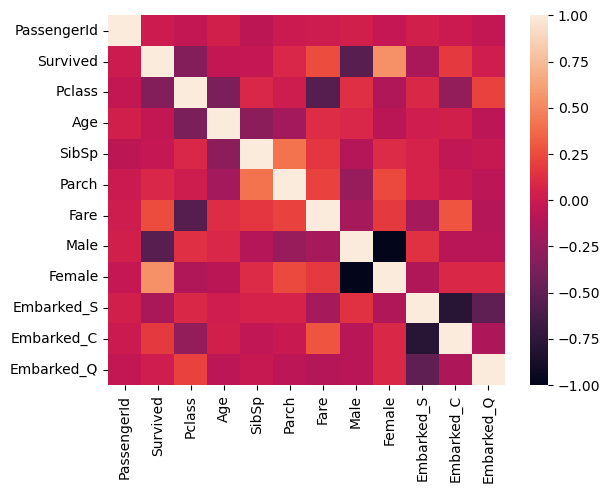

In [133]:
new_correlation_matrix = titanic3.corr()
sns.heatmap(new_correlation_matrix)
plt.show()

# Here is the plan:

### 3. Explore running logistic regression
###     Fine-tune: test it
### 4. Attempt Random Forest
### 5. Also look into Gradient Descent
### 6. Pick the best model
### 7. Explain the problem from a business perspective (insurance companies)
### 8. Submit results to competition
### 9. Publish notebook on GitHub and fully document it
### 10. Watch a tutorial to make it better

## Phase 3: Splitting Data into Training and Testing sets

In [143]:
from sklearn.model_selection import train_test_split

titanic3_train, titanic3_test = train_test_split(titanic3, test_size=0.3, train_size=0.7)

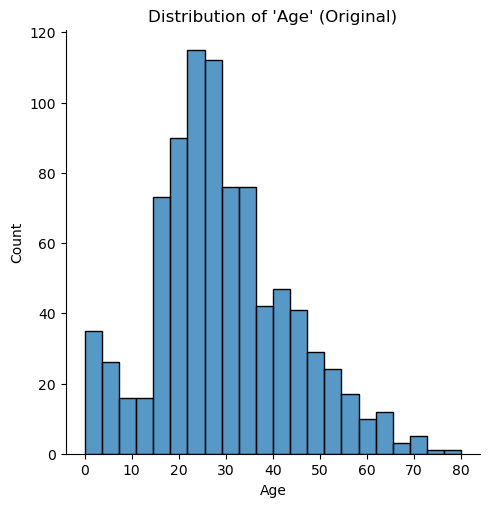

In [149]:
sns.displot(titanic3['Age'])
plt.title("Distribution of 'Age' (Original)")
plt.show()

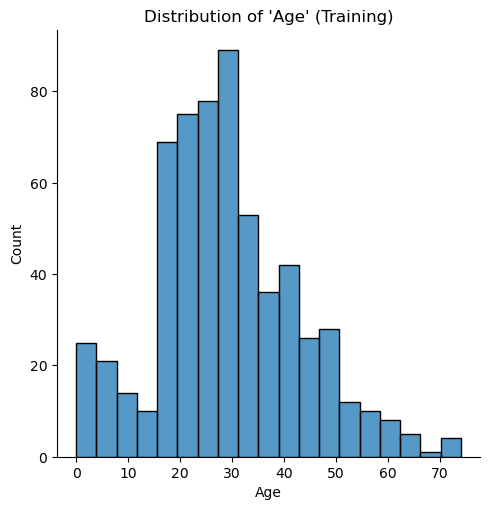

In [148]:
sns.displot(titanic3_train['Age'])
plt.title("Distribution of 'Age' (Training)")
plt.show()

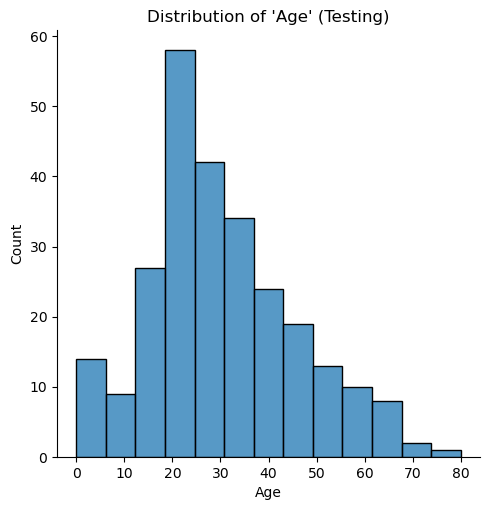

In [147]:
sns.displot(titanic3_test['Age'])
plt.title("Distribution of 'Age' (Testing)")
plt.show()

## Phase 4: Logistic Regression